In [2]:
import pandas as pd

# Charger les datasets
df_P = pd.read_csv('population.csv')
df_C = pd.read_csv('countries-in-conflict-data.csv')


In [3]:
# Pays européens
# Liste des pays européens
european_countries = [
    "Albania", "Germany", "Andorra", "Austria", "Belgium", "Belarus", 
    "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czechia", 
    "Denmark", "Estonia", "Finland", "France", "Georgia", "Greece", "Hungary", 
    "Iceland", "Ireland", "Italy", "Kazakhstan", "Kosovo", "Latvia", "Liechtenstein", 
    "Lithuania", "Luxembourg", "Malta", "Rep. of Moldova", "Monaco", "Montenegro", "Netherlands (Kingdom of the)", 
    "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russian Federation", "San Marino", 
    "Serbia and Kosovo: S/RES/1244 (1999)", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Türkiye", "Ukraine", 
    "United Kingdom of Great Britain and Northern Ireland", "Vatican City"
]

# Filtrer pour garder seulement les données des pays européens
european_df = df_P[df_P['coa_name'].isin(european_countries)]


In [4]:
Conflits_df = df_C[df_C['Year'].isin([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])]
Conflits_df.head()

,Entity,Code,Year,Deaths
19,Abkhazia,OWID_ABK,2008,0
20,Abkhazia,OWID_ABK,2009,0
21,Abkhazia,OWID_ABK,2010,0
22,Abkhazia,OWID_ABK,2011,0
23,Abkhazia,OWID_ABK,2012,0


In [5]:
# Somme total des réfugies en europe de 2010 à 2022
european_df2022 = european_df[european_df['year'] == 2022]
european_df2010 = european_df[european_df['year'] == 2010]
sum_Ref = european_df2022['refugees'].sum() - european_df2010['refugees'].sum()

print("Somme total des réfugies en europe de 2010 à 2022 est : ", sum_Ref)

Somme total des réfugies en europe de 2010 à 2022 est :  10748203


In [6]:
# Somme total des réfugies monde entier de 2010 à 2022
df2022 = df_P[df_P['year'] == 2022]
df2010 = df_P[df_P['year'] == 2010]
sum_df = df2022['refugees'].sum() - df2010['refugees'].sum()

print("Somme total des réfugies monde entier de 2010 à 2022 est : ", sum_df)

Somme total des réfugies monde entier de 2010 à 2022 est :  18864198


In [7]:
import pandas as pd

def summarize_refugee_data(df):
    """
    Crée un résumé des données de réfugiés pour chaque pays d'origine (coo_name) pour chaque année,
    en calculant le total des réfugiés de l'année, l'année précédente et la différence entre ces deux années.

    Parameters:
        df (pd.DataFrame): DataFrame contenant les données des réfugiés.

    Returns:
        pd.DataFrame: Un nouveau DataFrame avec les colonnes spécifiées pour chaque pays et chaque année.
    """
    # Initialiser une liste pour stocker les données résumées
    summary_data = []
    
    # Boucle sur les années spécifiées
    for year in range(2011, 2023):
        # Boucle sur chaque pays d'origine unique dans le DataFrame
        for country in df['coo_name'].unique():
            # Filtrer les données pour l'année et le pays spécifiques
            current_year_data = df[(df['year'] == year) & (df['coo_name'] == country)]
            previous_year_data = df[(df['year'] == year - 1) & (df['coo_name'] == country)]
            
            country_iso = str(current_year_data['coo_iso'].unique())
            country_iso = country_iso[2:5]
            
            # Calculer la somme des réfugiés pour l'année en cours et l'année précédente
            current_refugees_sum = current_year_data['refugees'].sum()
            previous_refugees_sum = previous_year_data['refugees'].sum()
            
            # Calculer la différence entre les deux années
            refugees_change = current_refugees_sum - previous_refugees_sum
            
            # Ajouter le résumé dans la liste
            summary_data.append({
                'Year': year,
                'Country of Origin': country,
                'Country ISO': country_iso,
                'Refugees Current Year': current_refugees_sum,
                'Refugees Last Year': previous_refugees_sum,
                'Change in Refugees': refugees_change
            })
    
    # Convertir la liste en DataFrame
    summary_df = pd.DataFrame(summary_data).sort_values(by='Change in Refugees', ascending=False)
    #summary_df = summary_df.sort_values(by='Change in Refugees', ascending=False)
    
    return summary_df

# Utilisation de la fonction
# Assurez-vous que votre DataFrame 'european_df' est correctement préparé et passé à la fonction
refugee_summary_df = summarize_refugee_data(european_df)
refugee_summary_df


,Year,Country of Origin,Country ISO,Refugees Current Year,Refugees Last Year,Change in Refugees
2202,2022,Ukraine,UKR,5592299,23301,5568998
845,2015,Syrian Arab Rep.,SYR,2782053,1696978,1085075
652,2014,Syrian Arab Rep.,SYR,1696978,652592,1044386
1231,2017,Syrian Arab Rep.,SYR,4240430,3478683,761747
1038,2016,Syrian Arab Rep.,SYR,3478683,2782053,696630
...,...,...,...,...,...,...
1044,2016,Ukraine,UKR,236097,318338,-82241
2014,2021,Unknown,UNK,80460,170039,-89579
1237,2017,Ukraine,UKR,136306,236097,-99791
390,2013,Serbia and Kosovo: S/RES/1244 (1999),SRB,46282,156385,-110103


In [8]:
refugee_summary_df.to_excel('refugee_summary_df.xlsx', index=False)
refugee_summary_df.to_csv('refugee_summary_df.csv', index=False)

In [9]:
def calculate_refugee_sum(df, country_name, year_new, year_old):

    # Filtrer les données pour le pays spécifié et les années données
    df_new = df[(df['coa_name'] == country_name) & (df['year'] == year_new)]
    df_old = df[(df['coa_name'] == country_name) & (df['year'] == year_old)]
    
    country_iso = str(df_new['coa_iso'].unique())
    country_iso = country_iso[2:5]
    
    # Calculer la somme des réfugiés pour chaque année et retourner la différence
    sum_refugees_new = df_new['refugees'].sum()
    sum_refugees_old = df_old['refugees'].sum()
    sum = sum_refugees_new - sum_refugees_old
    
    return sum, country_iso


In [10]:
sum = []
for country in european_countries :
    All = calculate_refugee_sum(european_df, country, 2022, 2010)
    sum_Ref_country = All[0]
    country_iso = All[1]
    #print("Nombre de réfugiés en", country, "de 2010 à 2022 est : ", sum_Ref_country)
    sum.append({"coa_name": country, "coa_iso": country_iso, "SumRef": sum_Ref_country})
df_sum = pd.DataFrame(sum)

In [11]:
df_sum.to_excel('df_sum.xlsx', index=False)


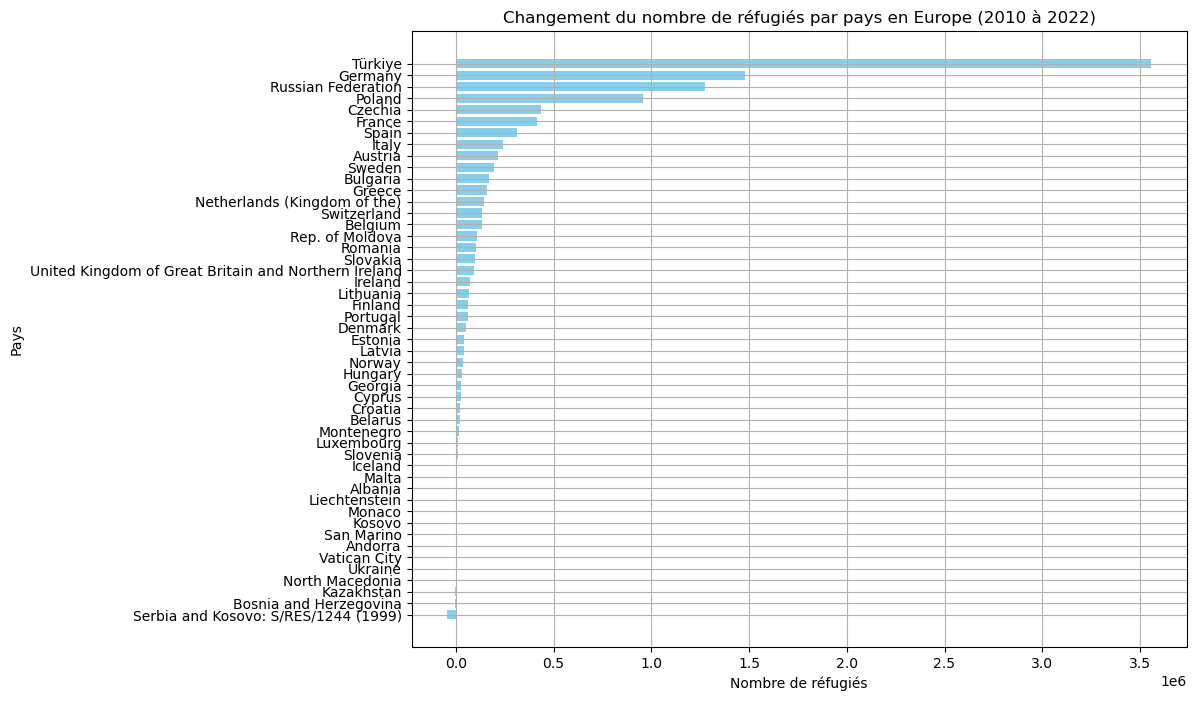

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

# Trier les données par SumRef pour une meilleure visualisation
df_sum_sorted = df_sum.sort_values(by='SumRef', ascending=True)

# Création du graphique en barres
plt.figure(figsize=(10, 8)) 
plt.barh(df_sum_sorted['coa_name'], df_sum_sorted['SumRef'], color='skyblue')
plt.xlabel('Nombre de réfugiés') 
plt.ylabel('Pays') 
plt.title('Changement du nombre de réfugiés par pays en Europe (2010 à 2022)')
plt.grid(True) 

# Afficher le graphique
plt.show()


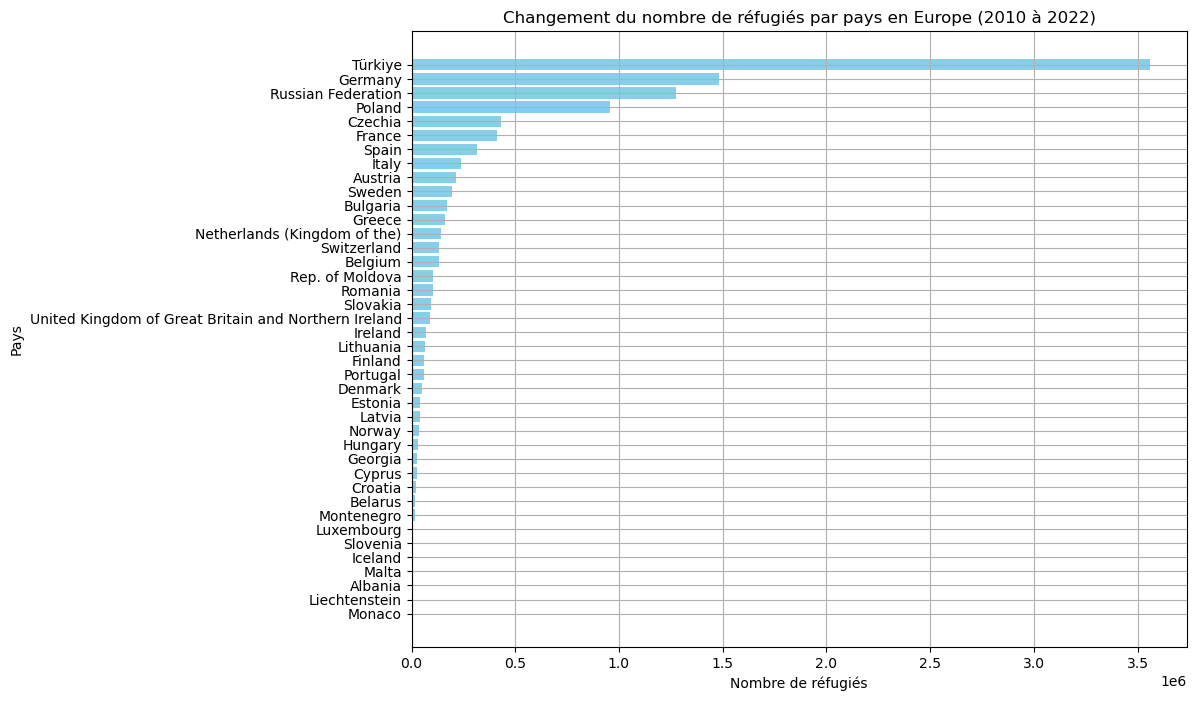

In [13]:
import matplotlib.pyplot as plt

filtered_df = df_sum[df_sum['SumRef'] > 0]
# Trier les données par SumRef pour une meilleure visualisation
df_sum_sorted = filtered_df.sort_values(by='SumRef', ascending=True)

# Création du graphique en barres
plt.figure(figsize=(10, 8)) 
plt.barh(df_sum_sorted['coa_name'], df_sum_sorted['SumRef'], color='skyblue')
plt.xlabel('Nombre de réfugiés') 
plt.ylabel('Pays') 
plt.title('Changement du nombre de réfugiés par pays en Europe (2010 à 2022)')
plt.grid(True) 

# Afficher le graphique
plt.show()

In [14]:

# Grouper par 'coo_name' et calculer la somme des réfugiés pour chaque pays d'origine
total_refugees_by_origin = european_df.groupby('coo_name')['refugees'].sum().reset_index()

# Afficher le résultat
total_refugees_by_origin.head()

,coo_name,refugees
0,Afghanistan,2819523
1,Albania,128636
2,Algeria,52690
3,Angola,105029
4,Anguilla,5
